# Libraries 

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime



conn = sqlite3.connect("Baseball_stats.db")



# Creating a cursor 

In [2]:
cur = conn.cursor()

result = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

result.fetchall()

[('AllstarFull',),
 ('Appearances',),
 ('AwardsManagers',),
 ('AwardsPlayers',),
 ('AwardsShareManagers',),
 ('AwardsSharePlayers',),
 ('Batting',),
 ('BattingPost',),
 ('CollegePlaying',),
 ('Fielding',),
 ('FieldingOF',),
 ('FieldingOFsplit',),
 ('FieldingPost',),
 ('HallOfFame',),
 ('HomeGames',),
 ('Managers',),
 ('ManagersHalf',),
 ('Parks',),
 ('People',),
 ('Pitching',),
 ('PitchingPost',),
 ('Salaries',),
 ('Schools',),
 ('SeriesPost',),
 ('Teams',),
 ('TeamsFranchises',),
 ('TeamsHalf',)]

# Creating a query to find active players that have played at least 50 games. ( Active = final game from 2020 to present)

In [3]:
Query = """
SELECT DISTINCT People.nameFirst, People.nameLast, People.nameGiven, people.finalGame, 
    people.weight, People.throws, People.bats, People.birthYear, People.birthMonth, People.birthDay, 
    people.birthCity, People.birthState, People.birthCountry,   Appearances.G_all, Batting.*
FROM People
JOIN Appearances
    ON People.playerID = Appearances.playerID
JOIN Batting
    ON people.playerID = Batting.playerID
WHERE Appearances.G_all >= 50 AND People.finalGame like "%202%"
GROUP by People.playerID, Batting.yearID
ORDER by G_all
"""

cur.execute(Query)


cur.fetchall()


[('Abraham',
  'Almonte',
  'Abraham',
  '2022-10-05',
  223,
  'R',
  'B',
  1989,
  6,
  27,
  'Santo Domingo',
  'Distrito Nacional',
  'D.R.',
  50,
  'almonab01',
  2013,
  1,
  'SEA',
  'AL',
  25,
  None,
  72,
  10,
  19,
  4,
  0,
  2,
  9,
  1,
  0,
  6,
  21,
  '0',
  0,
  2,
  2,
  2,
  None),
 ('Abraham',
  'Almonte',
  'Abraham',
  '2022-10-05',
  223,
  'R',
  'B',
  1989,
  6,
  27,
  'Santo Domingo',
  'Distrito Nacional',
  'D.R.',
  50,
  'almonab01',
  2014,
  1,
  'SEA',
  'AL',
  27,
  None,
  106,
  10,
  21,
  5,
  1,
  1,
  8,
  3,
  1,
  6,
  40,
  '0',
  1,
  0,
  0,
  1,
  None),
 ('Abraham',
  'Almonte',
  'Abraham',
  '2022-10-05',
  223,
  'R',
  'B',
  1989,
  6,
  27,
  'Santo Domingo',
  'Distrito Nacional',
  'D.R.',
  50,
  'almonab01',
  2015,
  1,
  'SDN',
  'NL',
  31,
  None,
  54,
  6,
  11,
  3,
  0,
  0,
  4,
  1,
  1,
  5,
  19,
  '0',
  0,
  3,
  0,
  1,
  None),
 ('Abraham',
  'Almonte',
  'Abraham',
  '2022-10-05',
  223,
  'R',
  'B',
  1

# Turning the query into a pandas DATA FRAME 

In [4]:
df = pd.read_sql_query(Query, conn)

df

,nameFirst,nameLast,nameGiven,finalGame,weight,throws,bats,birthYear,birthMonth,birthDay,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,Abraham,Almonte,Abraham,2022-10-05,223,R,B,1989,6,27,...,1,0,6,21,0,0,2,2,2,None
1,Abraham,Almonte,Abraham,2022-10-05,223,R,B,1989,6,27,...,3,1,6,40,0,1,0,0,1,None
2,Abraham,Almonte,Abraham,2022-10-05,223,R,B,1989,6,27,...,1,1,5,19,0,0,3,0,1,None
3,Abraham,Almonte,Abraham,2022-10-05,223,R,B,1989,6,27,...,8,0,8,42,1,1,0,3,5,None
4,Abraham,Almonte,Abraham,2022-10-05,223,R,B,1989,6,27,...,2,1,20,46,0,1,1,1,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,Corbin,Carroll,Corbin Franklin,2022-10-05,165,L,L,2000,8,21,...,2,1,8,31,0,3,0,0,1,None
7353,Corbin,Carroll,Corbin Franklin,2022-10-05,165,L,L,2000,8,21,...,54,5,57,125,1,13,6,4,7,None
7354,Spencer,Steer,Spencer Gordon,2022-10-05,185,R,R,1997,12,7,...,0,1,11,26,0,2,0,0,2,None
7355,Spencer,Steer,Spencer Gordon,2022-10-05,185,R,R,1997,12,7,...,15,3,68,139,0,11,0,4,9,None


# Checking Data types

In [5]:
df.dtypes

nameFirst       object
nameLast        object
nameGiven       object
finalGame       object
weight           int64
throws          object
bats            object
birthYear        int64
birthMonth       int64
birthDay         int64
birthCity       object
birthState      object
birthCountry    object
G_all            int64
playerID        object
yearID           int64
stint            int64
teamID          object
lgID            object
G                int64
G_batting       object
AB               int64
R                int64
H                int64
2B               int64
3B               int64
HR               int64
RBI              int64
SB               int64
CS               int64
BB               int64
SO               int64
IBB             object
HBP              int64
SH               int64
SF               int64
GIDP             int64
G_old           object
dtype: object

# Calculating Age and Concatinating first and last name

In [6]:
current_year = datetime.now().year
current_month = datetime.now().month
current_day = datetime.now().day


df['age'] = current_year - df['birthYear'] - ((current_month < df['birthMonth']) | ((current_month == df['birthMonth']) & (current_day < df['birthDay'])))

df['fullName'] = df['nameFirst'] + ' ' + df['nameLast']


# Dropping name and birth related columns and all row with NULL values

In [7]:
df = df.drop(columns=['nameFirst', 'nameLast', 'nameGiven', 'birthDay', 'birthMonth', 'birthYear', 'G_batting', 'G_old'])

df = df.dropna()
df

,finalGame,weight,throws,bats,birthCity,birthState,birthCountry,G_all,playerID,yearID,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,age,fullName
0,2022-10-05,223,R,B,Santo Domingo,Distrito Nacional,D.R.,50,almonab01,2013,...,0,6,21,0,0,2,2,2,35,Abraham Almonte
1,2022-10-05,223,R,B,Santo Domingo,Distrito Nacional,D.R.,50,almonab01,2014,...,1,6,40,0,1,0,0,1,35,Abraham Almonte
2,2022-10-05,223,R,B,Santo Domingo,Distrito Nacional,D.R.,50,almonab01,2015,...,1,5,19,0,0,3,0,1,35,Abraham Almonte
3,2022-10-05,223,R,B,Santo Domingo,Distrito Nacional,D.R.,50,almonab01,2016,...,0,8,42,1,1,0,3,5,35,Abraham Almonte
4,2022-10-05,223,R,B,Santo Domingo,Distrito Nacional,D.R.,50,almonab01,2017,...,1,20,46,0,1,1,1,2,35,Abraham Almonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,2022-10-05,165,L,L,Seattle,WA,USA,155,carroco02,2022,...,1,8,31,0,3,0,0,1,24,Corbin Carroll
7353,2022-10-05,165,L,L,Seattle,WA,USA,155,carroco02,2023,...,5,57,125,1,13,6,4,7,24,Corbin Carroll
7354,2022-10-05,185,R,R,Long Beach,CA,USA,156,steersp01,2022,...,1,11,26,0,2,0,0,2,26,Spencer Steer
7355,2022-10-05,185,R,R,Long Beach,CA,USA,156,steersp01,2023,...,3,68,139,0,11,0,4,9,26,Spencer Steer


# Finding the player with the most RBI's from the data frame from 2015_2018 and the total

In [8]:
df_RBI = df[df['yearID'].between(2015, 2018)]

total = df_RBI.groupby('fullName')['RBI'].sum()

top_player = total.sort_values(ascending=False).head(1)

name = top_player.index[0]
total = top_player.iloc[0]
print(f"player with the most RBI between 2015 and 2018 is: {name} with {total} RBI's")

player with the most RBI between 2015 and 2018 is: Nolan Arenado with 503 RBI's


# Finding the amout of times Albert pujols grounded into doble plays

In [9]:
pujols_2016 = df[(df['fullName'] == 'Albert Pujols') & (df['yearID'] == 2016)]['GIDP'].sum()

print (f"in 2016, Albert pujols had a total GIDP of {pujols_2016}")




in 2016, Albert pujols had a total GIDP of 24


# Histogram of tripples by year 

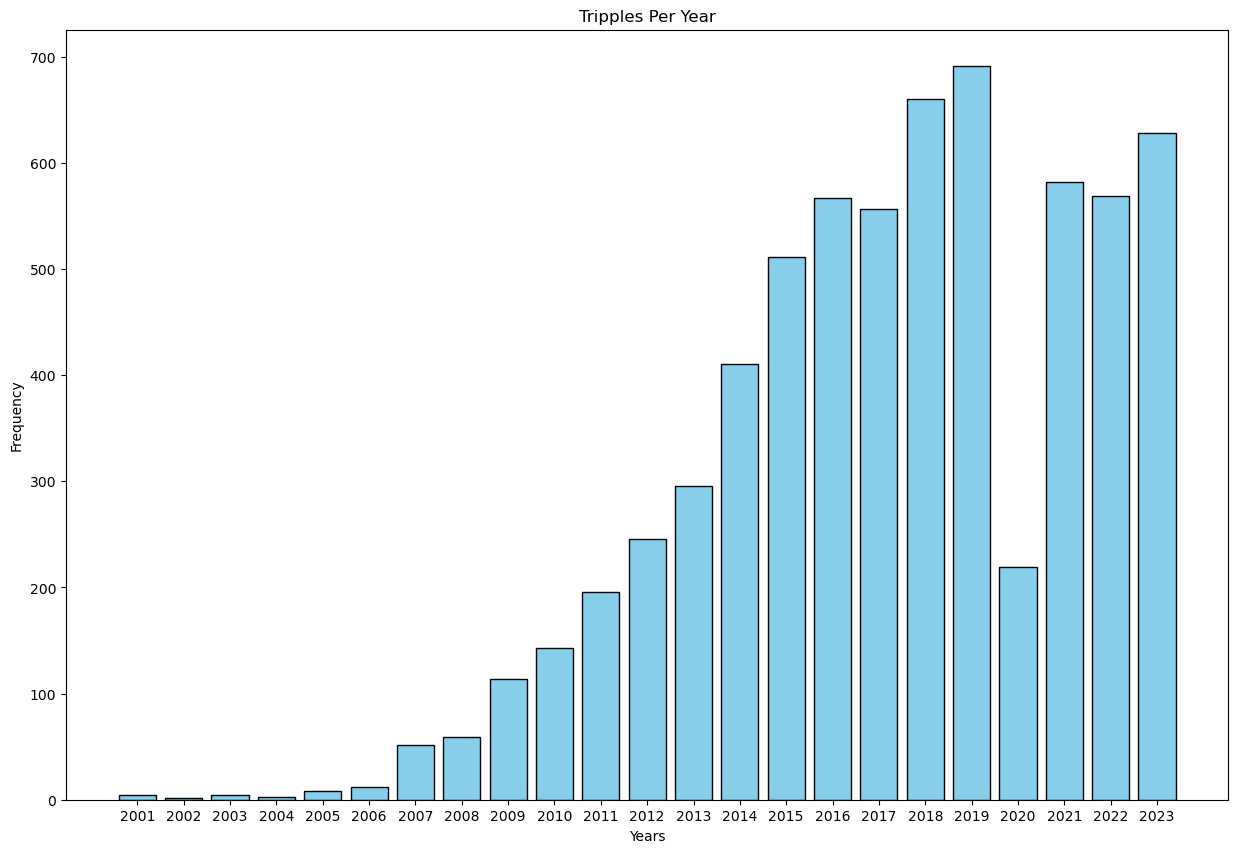

In [10]:
Triples = df.groupby('yearID')['3B'].sum()
plt.figure(figsize=(15, 10))
plt.bar(Triples.index, Triples.values, color='skyblue', edgecolor='black')
plt.title('Tripples Per Year')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(Triples.index)
plt.show()

# Scatter plot of Tripples vs stolen bases  and correlation between Triples (3B) and Steals (SB)

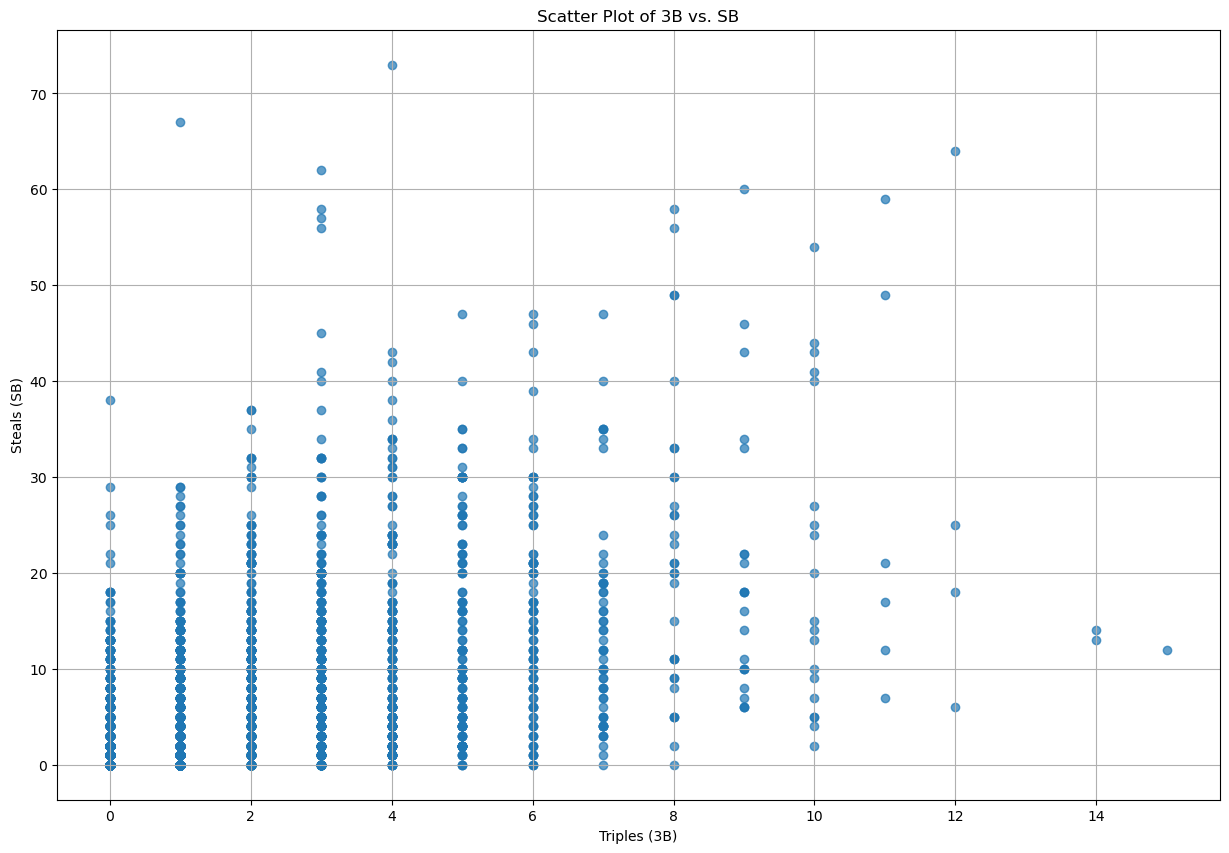

The correlation between Triples (3B) and Steals (SB) is: 0.62


In [11]:
plt.figure(figsize=(15,10))
plt.scatter(df['3B'], df['SB'], alpha=0.7)
plt.title('Scatter Plot of 3B vs. SB')
plt.xlabel('Triples (3B)')
plt.ylabel('Steals (SB)')
plt.grid(True)
plt.show()


correlation = df['3B'].corr(df['SB'])

print(f"The correlation between Triples (3B) and Steals (SB) is: {correlation:.2f}")




# Finding the year with the most Homeruns recorded among active players

In [12]:
 homeRuns_per_year = df.groupby('yearID')['HR'].sum()

year_with_most_homeRuns = homeRuns_per_year.idxmax()
max_homeRuns = homeRuns_per_year.max()

print(f"Year with the most home runs: {year_with_most_homeRuns} with {max_homeRuns} home runs")


Year with the most home runs: 2019 with 5834 home runs


# Finding the player with the maximum amount of tripples in a single season among active players and the year it happened 

In [13]:
max_triples_active_player = df[['fullName', 'yearID', '3B']].sort_values(by='3B', ascending=False).iloc[0]

print(f"Player with the most triples in a single season: {max_triples_active_player['fullName']} in {max_triples_active_player['yearID']} with {max_triples_active_player['3B']} triples")



Player with the most triples in a single season: Dexter Fowler in 2011 with 15 triples


# City with the highest number of players among active players 

In [14]:
city_player_count = df['birthCity'].value_counts()

city_with_most_players = city_player_count.idxmax()
player_count = city_player_count.max()

print(f"City with the most players: {city_with_most_players} ({player_count} players)")


City with the most players: Santo Domingo (232 players)


# Correlation between Baseball statistics 

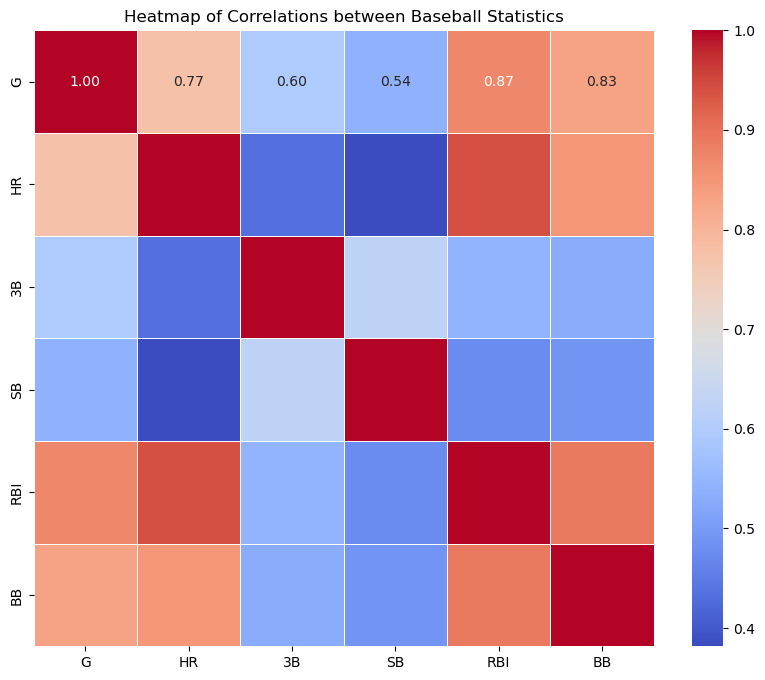

,G,HR,3B,SB,RBI,BB
G,1.000000,0.774323,0.597333,0.538723,0.870003,0.830678
HR,0.774323,1.000000,0.433341,0.381670,0.940116,0.848399
3B,0.597333,0.433341,1.000000,0.624923,0.545777,0.529331
SB,0.538723,0.381670,0.624923,1.000000,0.475783,0.490226
RBI,0.870003,0.940116,0.545777,0.475783,1.000000,0.890569
BB,0.830678,0.848399,0.529331,0.490226,0.890569,1.000000


In [15]:
correlation_matrix = df[['G', 'HR', '3B', 'SB', 'RBI', 'BB']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations between Baseball Statistics')
plt.show()

correlation_matrix